In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')

In [3]:
from tools import returnDEres

In [4]:
tmp = rna[(rna.obs['treatment'].isin(['Saline', '1.5MIU'])) & (rna.obs['timepoint'].isin(['post'])) & (rna.obs['fine_clustering'].isin(['CD4_Treg']))].copy()
tmp

AnnData object with n_obs × n_vars = 867 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
sc.tl.rank_genes_groups(tmp, groupby = 'treatment', method = 'wilcoxon', n_genes = 30000, pts= True)

In [9]:
returnDEres(tmp, column = '1.5MIU').to_csv('DEG/Treg_1.5MIUvsSaline_post_wilcoxon.csv')

In [28]:
genes = {'TNFA_SIGNALING_VIA_NFKB':["IL7R","BTG1","TNFAIP8","BIRC3","PNRC1","IER2","DUSP1"],
'HYPOXIA\n':["S100A4","GAPDH","ENO1","ISG20","ANXA2","GLRX","PIM1"],
'CHOLESTEROL_HOMEOSTASIS':["LGALS3","ACTG1","S100A11","ECH1","FDFT1"],
'ESTROGEN_RESPONSE_EARLY\n':["CISH","ELOVL5","AQP3","FDFT1"],
'APICAL_JUNCTION':["ACTG1","PFN1","RAC2","GNAI2","MYL12B","ACTB","ZYX","ARPC2","RHOF","ACTN4"],
'COMPLEMENT\n':["LGALS3","PFN1","CTSC","PIM1","GNAI2","CALM3","RHOG"],
'MTORC1_SIGNALING':["GAPDH","ENO1","PPIA","CTSC","GLRX","SHMT2","TCEA1","PRDX1","ELOVL5","CORO1A"],
'EPITHELIAL_MESENCHYMAL_TRANSITION\n':["IL32","LGALS1","FLNA","VIM","EMP3","TGFB1","TPM4"],
'FATTY_ACID_METABOLISM':["LGALS1","S100A10","ELOVL5","HPGD","ECH1","DECR1","MIF","YWHAH","MDH2","ACADVL"],
'OXIDATIVE_PHOSPHORYLATION\n':["ATP5MC2","COX6B1","COX5A","SLC25A6","NDUFA6","COX8A","UQCRH","ATP5MG","UQCR10","COX17"],
'GLYCOLYSIS':["ENO1","PPIA","ISG20","GLRX","TXN","HAX1","MIF","MDH2","SOD1"],
'P53_PATHWAY\n':["S100A4","S100A10","HINT1","VAMP8","CDKN2A","BAX","TGFB1"],
'ANGIOGENESIS':["S100A4","TIMP1"]}

In [26]:
tmp = rna[(rna.obs['treatment'].isin(['Saline', '1.5MIU'])) & (rna.obs['fine_clustering'].isin(['CD4_Treg']))].copy()
tmp.obs['group'] = [c + '_' + g for c,g in zip(tmp.obs['treatment'], tmp.obs['timepoint'])]
tmp

AnnData object with n_obs × n_vars = 1300 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id', 'group'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', '

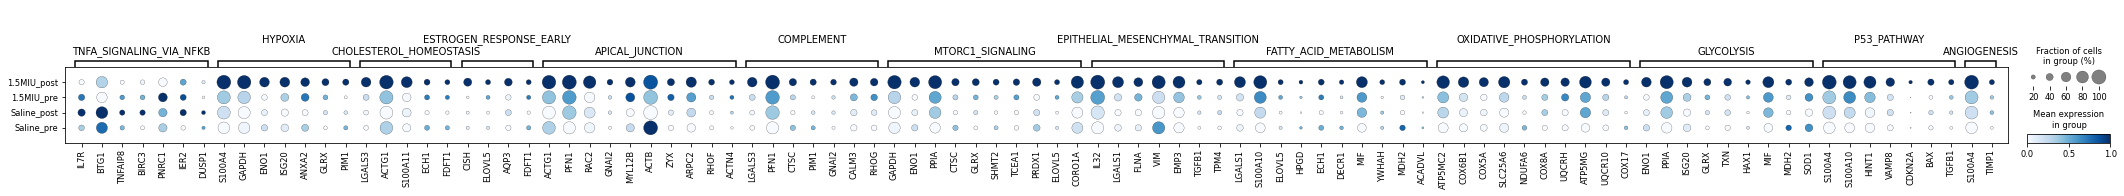

In [30]:
sc.pl.dotplot(tmp, genes, groupby = 'group', standard_scale = 'var', color_map = 'Blues', var_group_rotation = 0)

In [31]:
genes = {'TNFA_SIGNALING_VIA_NFKB':["IL7R","BTG1","TNFAIP8","BIRC3","PNRC1"],
'HYPOXIA\n':["S100A4","GAPDH","ENO1","ISG20","ANXA2"],
'CHOLESTEROL_HOMEOSTASIS':["LGALS3","ACTG1","S100A11","ECH1","FDFT1"],
'ESTROGEN_RESPONSE_EARLY\n':["CISH","ELOVL5","AQP3","FDFT1"],
'APICAL_JUNCTION':["ACTG1","PFN1","RAC2","GNAI2","MYL12B"],
'COMPLEMENT\n':["LGALS3","PFN1","CTSC","PIM1","GNAI2"],
'MTORC1_SIGNALING':["GAPDH","ENO1","PPIA","CTSC","GLRX"],
'EPITHELIAL_MESENCHYMAL_TRANSITION\n':["IL32","LGALS1","FLNA","VIM","EMP3"],
'FATTY_ACID_METABOLISM':["LGALS1","S100A10","ELOVL5","HPGD","ECH1"],
'OXIDATIVE_PHOSPHORYLATION\n':["ATP5MC2","COX6B1","COX5A","SLC25A6","NDUFA6"],
'GLYCOLYSIS':["ENO1","PPIA","ISG20","GLRX","TXN"],
'P53_PATHWAY\n':["S100A4","S100A10","HINT1","VAMP8","CDKN2A"],
'ANGIOGENESIS':["S100A4","TIMP1"]}

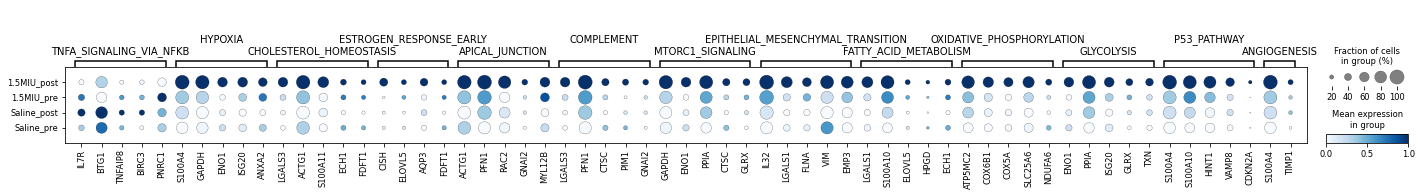

In [32]:
sc.pl.dotplot(tmp, genes, groupby = 'group', standard_scale = 'var', color_map = 'Blues', var_group_rotation = 0)

In [35]:
genes = {'TNFA_SIGNALING_VIA_NFKB':["IL7R","BTG1","TNFAIP8","BIRC3","PNRC1"],
'HYPOXIA\n':["S100A4","GAPDH","ENO1","ISG20","ANXA2"],
'CHOLESTEROL_HOMEOSTASIS':["LGALS3","ACTG1","S100A11","ECH1","FDFT1"],
'ESTROGEN_RESPONSE_EARLY\n':["CISH","ELOVL5","AQP3","FDFT1"],
# 'APICAL_JUNCTION':["ACTG1","PFN1","RAC2","GNAI2","MYL12B"],
# 'COMPLEMENT\n':["LGALS3","PFN1","CTSC","PIM1","GNAI2"],
'MTORC1_SIGNALING':["GAPDH","ENO1","PPIA","CTSC","GLRX"],
# 'EPITHELIAL_MESENCHYMAL_TRANSITION\n':["IL32","LGALS1","FLNA","VIM","EMP3"],
'FATTY_ACID_METABOLISM\n':["LGALS1","S100A10","ELOVL5","HPGD","ECH1"],
'OXIDATIVE_PHOSPHORYLATION':["ATP5MC2","COX6B1","COX5A","SLC25A6","NDUFA6"],
'GLYCOLYSIS\n':["ENO1","PPIA","ISG20","GLRX","TXN"]}
# 'P53_PATHWAY\n':["S100A4","S100A10","HINT1","VAMP8","CDKN2A"],
# 'ANGIOGENESIS':["S100A4","TIMP1"]}

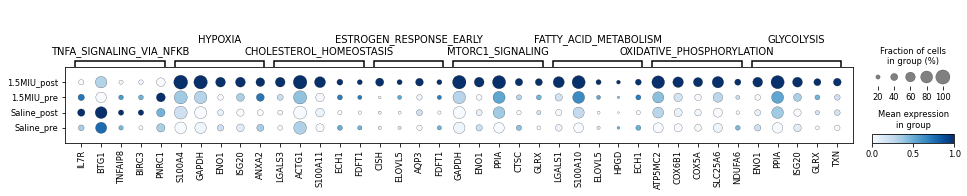

In [36]:
sc.pl.dotplot(tmp, genes, groupby = 'group', standard_scale = 'var', color_map = 'Blues', var_group_rotation = 0)